In [85]:
# Import relevant libaries

import pandas as pd
import os
from pathlib import Path
import openpyxl  # Ensure openpyxl is installed
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## 1. Import cleaned and standardized datasets for both conditions

In [57]:
# Load the df_chat_surveys.csv file
data_dir = Path('chat_exports')
df_chat_surveys = pd.read_csv(data_dir / 'df_chat_surveys_standardized.csv', sep=',')
print(f"df_chat_surveys shape: {df_chat_surveys.shape}")
# Preview the dataset
df_chat_surveys.head()

df_chat_surveys shape: (45, 74)


,participant_id,created_at,ip_address,device_type,background_submitted_at,q1_age_group,q2_gender,q3_education,q4_employment,q5_nationality,...,q29_tool_easier_task,q30_tool_useful,q31_tool_too_much_info,q32_tool_difficult_focus,q33_results_accurate,q34_results_trust,q35_results_complete,q36_results_relevant,q37_results_useful,q40_purchase_likelihood
0,fe4a79bb-642e-49d8-920a-a5f39035ffe3,2025-11-20 16:22:11.281835+00,"84.17.45.206,84.17.45.206, 99.82.172.145",desktop,2025-11-20 16:23:00.392222+00:00,18-24,Female,High school or below,Student,Indo,...,6,5,7,6,7,5,5,6,7,2
1,151939c4-8aae-490b-92eb-c7d353a4a95c,2025-11-18 18:15:57.927115+00,"193.197.8.143,193.197.8.143, 99.82.163.77",desktop,2025-11-18 18:17:10.869409+00:00,35-44,Male,Master's degree,Employed,Iranian,...,6,7,6,4,4,5,5,5,5,6
2,e2f70344-8588-468c-9dc2-8c2993f5b6c9,2025-11-15 23:28:20.372283+00,"178.84.99.93,178.84.99.93, 3.2.59.182",desktop,2025-11-15 23:29:47.088239+00:00,18-24,Female,Bachelor's degree,Student,Nederland,...,5,5,6,5,3,4,4,6,3,5
3,88584cfe-a550-4209-a1f3-be628bb2647b,2025-11-13 16:29:27.470605+00,"89.92.129.28,89.92.129.28, 99.82.161.171",desktop,2025-11-13 16:30:20.934922+00:00,35-44,Male,Master's degree,Self-employed,French,...,6,6,6,4,5,5,5,5,5,4
4,25e47297-047a-4582-bc17-c13f5b2ef07b,2025-11-13 12:54:47.011689+00,"153.92.90.3,153.92.90.3, 99.82.163.72",mobile,2025-11-13 12:55:37.488309+00:00,18-24,Female,Bachelor's degree,Student,Georgian,...,5,5,4,5,7,7,7,7,7,4


In [58]:
# Load the df_gg_surveys.csv file
data_dir = Path('google_exports')
df_gg_surveys = pd.read_csv(data_dir / 'df_gg_surveys_standardised.csv', sep=',')
print(f"df_gg_surveys shape: {df_gg_surveys.shape}")
# Preview the dataset
df_gg_surveys.head()

df_gg_surveys shape: (52, 69)


,participant_id,q1_age_group,q2_gender,q3_education,q4_employment_status,q5_nationality,q5_nationality_sd,q6_residence,q6_residence_sd,q7_chatbot_familiarity,...,q42_comments,background_submitted_at,instruction_submitted_at,postsurvey_submitted_at,ip_address,device_type,results_submitted_at,session_start_time,session_end_time,session_duration_ms
0,09e6255b-ed66-4eea-a314-104a08130ac0,35-44,Female,Doctorate / PhD,Employed,UK,UK,UK,UK,7,...,"I liked the more minimal interface, and I like...",2025-10-31 22:11:56.864775+00:00,2025-10-31 22:12:41.977243+00:00,2025-10-31 22:22:26.969691+00:00,129.67.117.187,desktop,2025-10-31 22:19:44.042285+00:00,2025-10-31 22:10:58.834+00,2025-10-31 22:18:19.43+00,440596.0
1,15ef74b6-a61a-474c-b855-696b20ce58fb,55 and above,Male,Master's degree,Employed,German,Germany,Germany,Germany,1,...,Maybe,2025-10-24 14:12:35.527412+00:00,2025-10-24 14:21:30.862457+00:00,2025-10-24 14:28:43.167002+00:00,213.146.69.174,desktop,2025-10-24 14:27:11.483904+00:00,2025-10-24 14:11:51.631+00,2025-10-24 14:24:48.07+00,776439.0
2,1f0df1be-a1ea-4080-90c3-230fe9e35174,18-24,Female,Bachelor's degree,Student,United States,USA,United States,USA,6,...,"Yes, it showed me relevant results for what I ...",2025-11-10 03:25:51.855943+00:00,2025-11-10 03:26:25.769685+00:00,2025-11-10 03:29:58.830293+00:00,108.2.105.241,desktop,2025-11-10 03:28:20.935272+00:00,2025-11-10 03:25:14.283+00,2025-11-10 03:26:06.698+00,52415.0
3,2afa9961-1844-49e8-80fc-444466532f46,25-34,Female,Master's degree,Employed,Russian,NaN,Russia,Russia,6,...,"Yes, the tool was transparent and easy to use,...",2025-10-24 17:08:04.105300+00:00,2025-10-24 17:10:42.739044+00:00,2025-10-24 17:15:27.907607+00:00,2a00:1370:8180:f390:10f5:bcf9:8f0:be3f,mobile,2025-10-24 17:12:41.450159+00:00,2025-10-24 17:06:39.799+00,2025-10-24 17:10:49.029+00,249230.0
4,2d8dd1db-9d38-49e0-bf03-5b4735523d27,18-24,Female,High school or below,Student,Swiss,Switzerland,Switzerland,Switzerland,7,...,"No, AI didn’t show the classical bar abovd",2025-10-29 09:54:21.050268+00:00,2025-10-29 09:54:41.702835+00:00,2025-10-29 10:01:23.058400+00:00,172.225.188.246,mobile,2025-10-29 09:58:09.817211+00:00,2025-10-29 09:52:50.793+00,2025-10-29 09:54:46.465+00,115672.0


## 2. Demographics Analysis

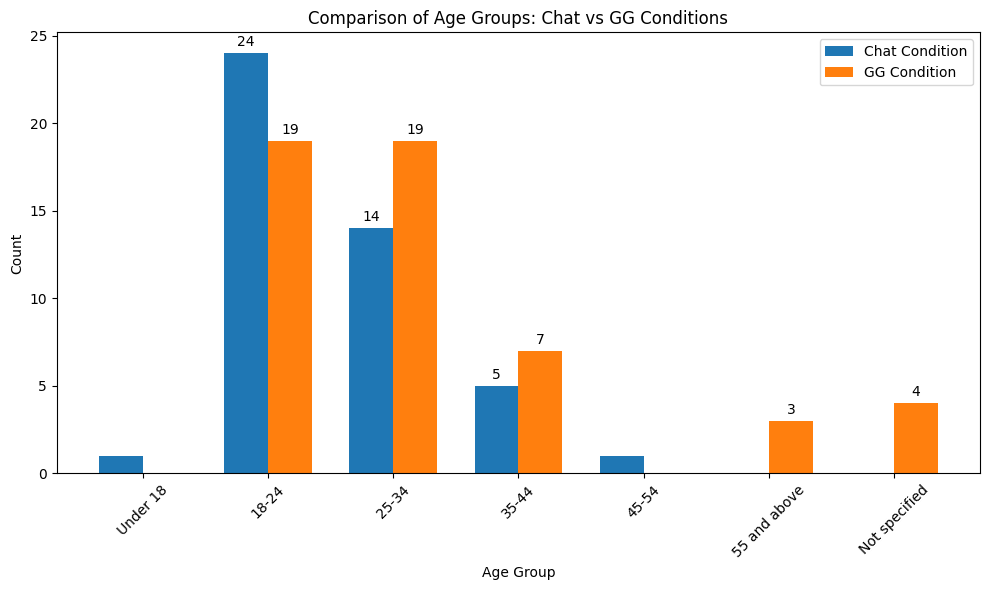

In [59]:
# Bar chart comparing q1_age_group for chat and gg conditions, with custom age group order and annotations
custom_age_order = ["Under 18", "18-24", "25-34", "35-44", "45-54", "55 and above", "Not specified"]
df_chat_surveys['q1_age_group'] = df_chat_surveys['q1_age_group'].fillna('Not specified')
df_gg_surveys['q1_age_group'] = df_gg_surveys['q1_age_group'].fillna('Not specified')
chat_counts = df_chat_surveys['q1_age_group'].value_counts().reindex(custom_age_order, fill_value=0)
gg_counts = df_gg_surveys['q1_age_group'].value_counts().reindex(custom_age_order, fill_value=0)
bar_width = 0.35
x = range(len(custom_age_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], custom_age_order, rotation=45)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Comparison of Age Groups: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

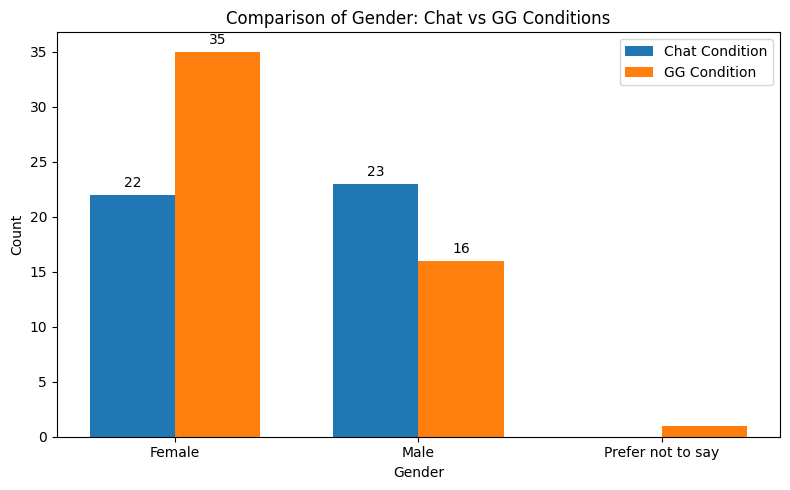

In [60]:
# Bar chart comparing q2_gender for chat and gg conditions, with annotations
df_chat_surveys['q2_gender'] = df_chat_surveys['q2_gender'].fillna('Not specified')
df_gg_surveys['q2_gender'] = df_gg_surveys['q2_gender'].fillna('Not specified')
chat_gender_counts = df_chat_surveys['q2_gender'].value_counts().sort_index()
gg_gender_counts = df_gg_surveys['q2_gender'].value_counts().sort_index()
genders = sorted(set(chat_gender_counts.index).union(set(gg_gender_counts.index)))
chat_gender_counts = chat_gender_counts.reindex(genders, fill_value=0)
gg_gender_counts = gg_gender_counts.reindex(genders, fill_value=0)
bar_width = 0.35
x = range(len(genders))
plt.figure(figsize=(8,5))
bars1 = plt.bar(x, chat_gender_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_gender_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], genders, rotation=0)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparison of Gender: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

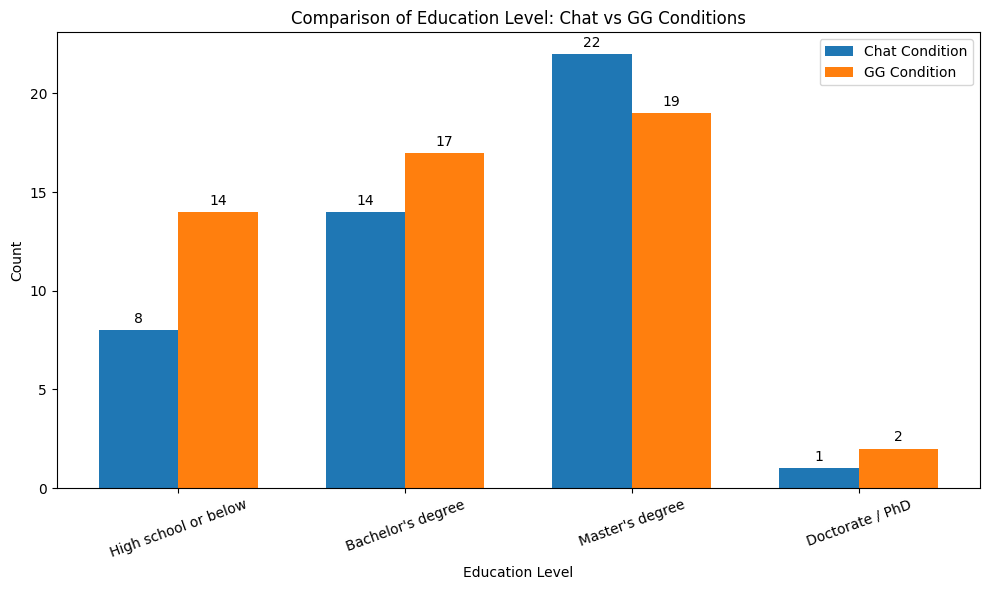

In [61]:
# Bar chart comparing q3_education for chat and gg conditions, with custom order and annotations
custom_edu_order = ["High school or below", "Bachelor's degree", "Master's degree", "Doctorate / PhD"]
df_chat_surveys['q3_education'] = df_chat_surveys['q3_education'].fillna('Not specified')
df_gg_surveys['q3_education'] = df_gg_surveys['q3_education'].fillna('Not specified')
chat_edu_counts = df_chat_surveys['q3_education'].value_counts().reindex(custom_edu_order, fill_value=0)
gg_edu_counts = df_gg_surveys['q3_education'].value_counts().reindex(custom_edu_order, fill_value=0)
bar_width = 0.35
x = range(len(custom_edu_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_edu_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_edu_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], custom_edu_order, rotation=20)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Comparison of Education Level: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    plt.annotate(f'{int(height)}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

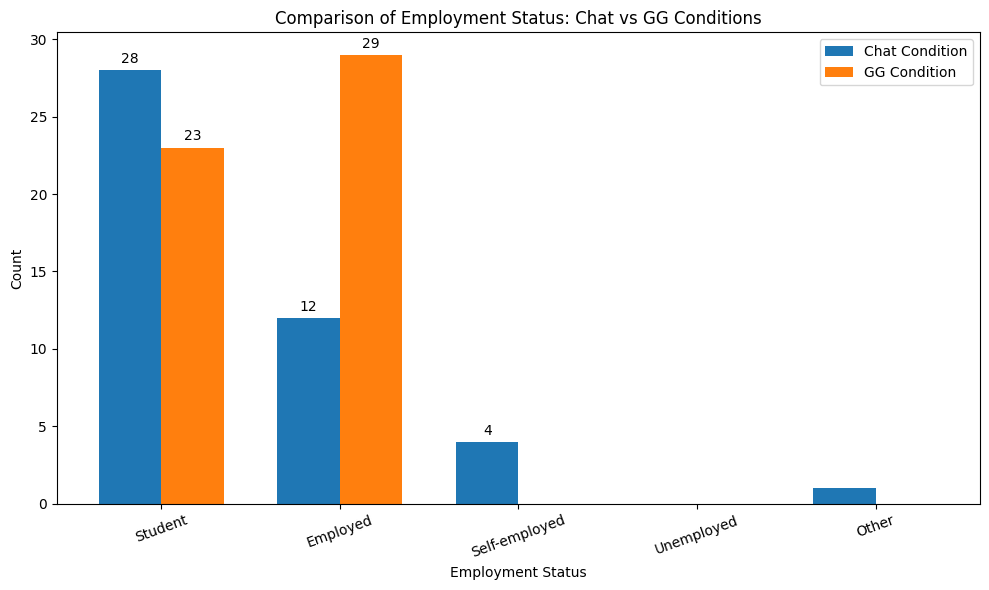

In [62]:
# Bar chart comparing q4_employment for chat and gg conditions, with custom order and annotations
custom_emp_order = ["Student", "Employed", "Self-employed", "Unemployed", "Other"]
# Rename q4_employment_status to q4_employment in gg dataset if needed
if 'q4_employment_status' in df_gg_surveys.columns:
    df_gg_surveys = df_gg_surveys.rename(columns={'q4_employment_status': 'q4_employment'})
df_chat_surveys['q4_employment'] = df_chat_surveys['q4_employment'].fillna('Not specified')
df_gg_surveys['q4_employment'] = df_gg_surveys['q4_employment'].fillna('Not specified')
chat_emp_counts = df_chat_surveys['q4_employment'].value_counts().reindex(custom_emp_order, fill_value=0)
gg_emp_counts = df_gg_surveys['q4_employment'].value_counts().reindex(custom_emp_order, fill_value=0)
bar_width = 0.35
x = range(len(custom_emp_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_emp_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_emp_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], custom_emp_order, rotation=20)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Comparison of Employment Status: Chat vs GG Conditions')
plt.legend()
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

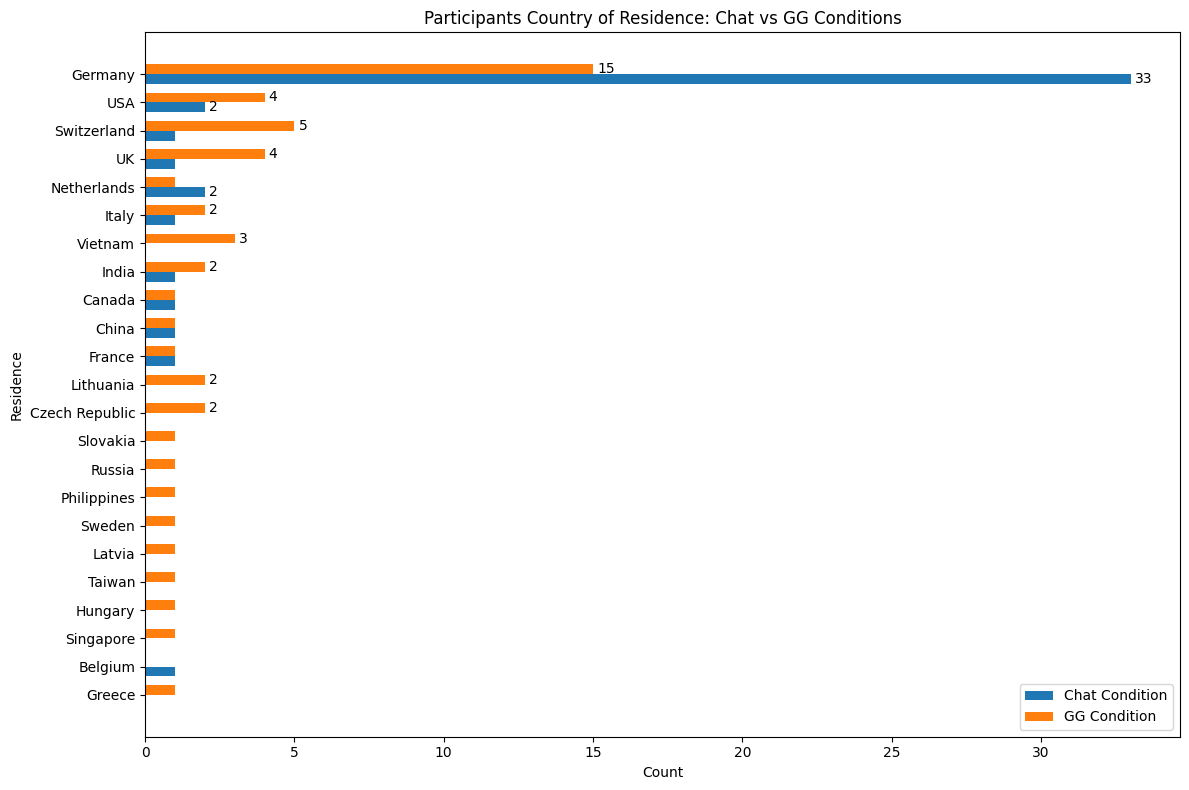

In [63]:
# Clean leading/trailing spaces in chat q6_residence_sd before plotting
df_chat_surveys['q6_residence_sd'] = df_chat_surveys['q6_residence_sd'].str.strip()

# Horizontal bar chart comparing q6_residence_sd for chat and gg conditions, ascending order by count, annotate only if count >= 2
df_chat_surveys['q6_residence_sd'] = df_chat_surveys['q6_residence_sd'].fillna('Not specified')
df_gg_surveys['q6_residence_sd'] = df_gg_surveys['q6_residence_sd'].fillna('Not specified')
chat_res_counts = df_chat_surveys['q6_residence_sd'].value_counts()
gg_res_counts = df_gg_surveys['q6_residence_sd'].value_counts()
all_residences = set(chat_res_counts.index).union(set(gg_res_counts.index))
# Get total counts for sorting
total_counts = {res: chat_res_counts.get(res,0) + gg_res_counts.get(res,0) for res in all_residences}
sorted_residences = sorted(all_residences, key=lambda x: total_counts[x])
chat_res_counts = chat_res_counts.reindex(sorted_residences, fill_value=0)
gg_res_counts = gg_res_counts.reindex(sorted_residences, fill_value=0)
bar_height = 0.35
y = range(len(sorted_residences))
plt.figure(figsize=(12,8))
bars1 = plt.barh(y, chat_res_counts, height=bar_height, label='Chat Condition')
bars2 = plt.barh([i + bar_height for i in y], gg_res_counts, height=bar_height, label='GG Condition')
plt.yticks([i + bar_height/2 for i in y], sorted_residences)
plt.ylabel('Residence')
plt.xlabel('Count')
plt.title('Participants Country of Residence: Chat vs GG Conditions')
plt.legend()
for idx, bar in enumerate(bars1):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
for idx, bar in enumerate(bars2):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

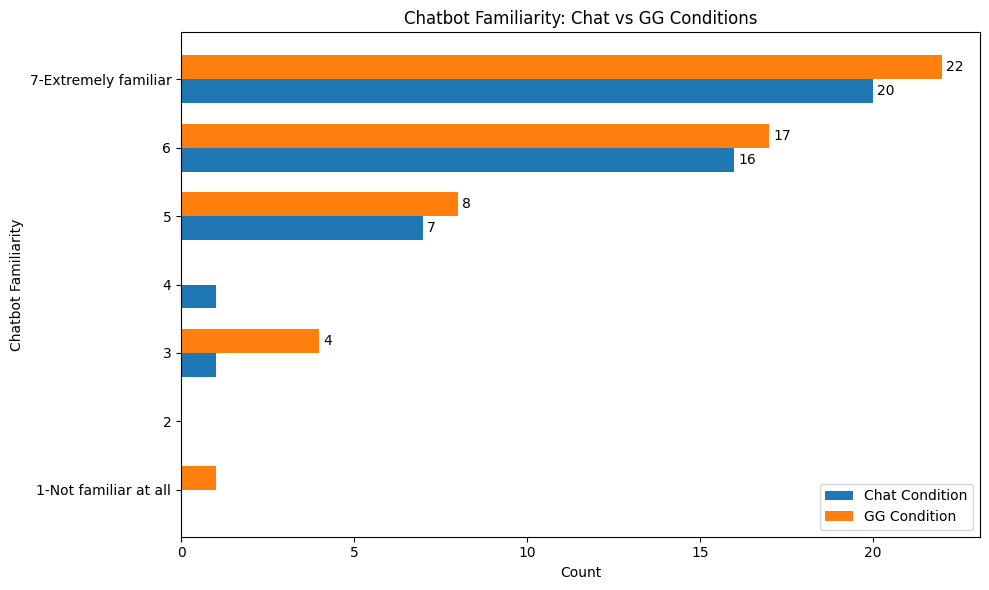

In [64]:
# Horizontal bar chart for chatbot familiarity, annotate only if count > 1
def map_familiarity(val):
    if pd.isna(val):
        return 'Not specified'
    val_str = str(val).strip()
    mapping = {
        '1': '1-Not familiar at all',
        '2': '2',
        '3': '3',
        '4': '4',
        '5': '5',
        '6': '6',
        '7': '7-Extremely familiar'
    }
    return mapping.get(val_str, val_str)
df_chat_surveys['q7_chatbot_familiarity_mapped'] = df_chat_surveys['q7_chatbot_familiarity'].apply(map_familiarity)
df_gg_surveys['q7_chatbot_familiarity_mapped'] = df_gg_surveys['q7_chatbot_familiarity'].apply(map_familiarity)
custom_fam_order = ["1-Not familiar at all", "2", "3", "4", "5", "6", "7-Extremely familiar"]
chat_fam_counts = df_chat_surveys['q7_chatbot_familiarity_mapped'].value_counts().reindex(custom_fam_order, fill_value=0)
gg_fam_counts = df_gg_surveys['q7_chatbot_familiarity_mapped'].value_counts().reindex(custom_fam_order, fill_value=0)
bar_height = 0.35
y = range(len(custom_fam_order))
plt.figure(figsize=(10,6))
bars1 = plt.barh(y, chat_fam_counts, height=bar_height, label='Chat Condition')
bars2 = plt.barh([i + bar_height for i in y], gg_fam_counts, height=bar_height, label='GG Condition')
plt.yticks([i + bar_height/2 for i in y], custom_fam_order)
plt.ylabel('Chatbot Familiarity')
plt.xlabel('Count')
plt.title('Chatbot Familiarity: Chat vs GG Conditions')
plt.legend()
for idx, bar in enumerate(bars1):
    width = bar.get_width()
    if width > 1:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
for idx, bar in enumerate(bars2):
    width = bar.get_width()
    if width > 1:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

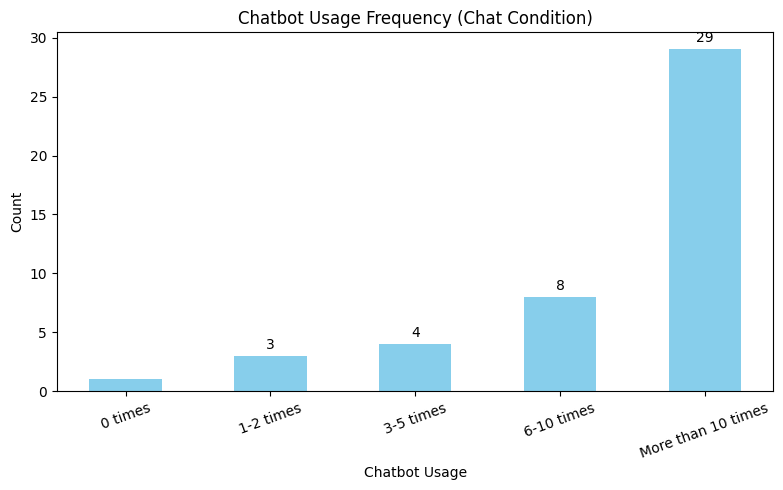

In [65]:
# Bar chart for q9_chatbot_usage in df_chat_surveys with custom order and annotation for count >= 2
custom_usage_order = ["0 times", "1-2 times", "3-5 times", "6-10 times", "More than 10 times"]
df_chat_surveys['q9_chatbot_usage'] = df_chat_surveys['q9_chatbot_usage'].fillna('Not specified')
usage_counts = df_chat_surveys['q9_chatbot_usage'].value_counts().reindex(custom_usage_order, fill_value=0)
bar_width = 0.5
x = range(len(custom_usage_order))
plt.figure(figsize=(8,5))
bars = plt.bar(x, usage_counts, width=bar_width, color='skyblue')
plt.xticks(x, custom_usage_order, rotation=20)
plt.xlabel('Chatbot Usage')
plt.ylabel('Count')
plt.title('Chatbot Usage Frequency (Chat Condition)')
for idx, bar in enumerate(bars):
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

#### Clean and standardize tool names in q10_tool_1 to q10_tool_4 in df_gg_surveys

In [66]:
# List unique values and their counts for q10_tool_1 to q10_tool_4 in df_gg_surveys
from collections import Counter
tools = []
for col in ["q10_tool_1", "q10_tool_2", "q10_tool_3", "q10_tool_4"]:
    if col in df_gg_surveys.columns:
        tools.extend(df_gg_surveys[col].dropna().astype(str).tolist())
tool_counts = Counter(tools)
print("Unique tool values and their counts across q10_tool_1 to q10_tool_4:")
for tool, count in tool_counts.items():
    print(f"{tool}: {count}")

Unique tool values and their counts across q10_tool_1 to q10_tool_4:
Google: 39
Shopee: 3
Amazon: 17
RedNote: 1
Walmart: 1
Ebay: 1
TikTok: 3
Taobao: 1
Google target: 1
Shein: 1
directly on target shop website: 1
Price comparison sites: 1
Ecommerce site (Shopee): 1
Etsy: 1
official website: 1
Facebook: 1
Vinted: 1
AI LLM: 1
Vialibri: 1
Chatgpt: 1


In [67]:
# Clean and standardize tool names in q10_tool_1 to q10_tool_4 in df_gg_surveys, with refined logic for 'Google target' in q10_tool_2
def clean_and_split_tools(row):
    replacements = {
        'Google target': None,  # handled separately below
        'directly on target shop website': 'Official websites',
        'Ecommerce site (Shopee)': 'Shopee',
        'official website': 'Official websites',
        'Chatgpt': 'ChatGPT'
    }
    # Clean each tool column
    for col in ["q10_tool_1", "q10_tool_2", "q10_tool_3", "q10_tool_4"]:
        val = row.get(col, None)
        if pd.isna(val):
            continue
        val = str(val)
        if col == "q10_tool_2" and val == "Google target":
            row["q10_tool_2"] = "Google"
            # Only set q10_tool_3 if it is empty or NaN
            if pd.isna(row.get("q10_tool_3", None)) or row["q10_tool_3"] == '':
                row["q10_tool_3"] = "Target"
            else:
                row["q10_tool_3"] = str(row["q10_tool_3"]) + ", Target"
            continue
        # Apply replacements for other values
        if val in replacements and replacements[val] is not None:
            row[col] = replacements[val]
        else:
            row[col] = val
    return row

tool_cols = ["q10_tool_1", "q10_tool_2", "q10_tool_3", "q10_tool_4"]
if all(col in df_gg_surveys.columns for col in tool_cols):
    df_gg_surveys[tool_cols] = df_gg_surveys.apply(clean_and_split_tools, axis=1)[tool_cols]

# Preview the affected columns to confirm
df_gg_surveys[tool_cols].head(52)

,q10_tool_1,q10_tool_2,q10_tool_3,q10_tool_4
0,Google,Ebay,Etsy,Vialibri
1,Google,NaN,NaN,NaN
2,Google,NaN,NaN,NaN
3,Google,NaN,NaN,NaN
4,Google,TikTok,Official websites,NaN
5,Google,NaN,NaN,NaN
6,Google,NaN,NaN,NaN
7,Google,NaN,NaN,NaN
8,Shopee,NaN,NaN,NaN
9,Google,NaN,NaN,NaN


In [68]:
# List unique values and their counts for q10_tool_1 to q10_tool_4 in df_gg_surveys
from collections import Counter
tools = []
for col in ["q10_tool_1", "q10_tool_2", "q10_tool_3", "q10_tool_4"]:
    if col in df_chat_surveys.columns:
        tools.extend(df_chat_surveys[col].dropna().astype(str).tolist())
tool_counts = Counter(tools)
print("Unique tool values and their counts across q10_tool_1 to q10_tool_4:")
for tool, count in tool_counts.items():
    print(f"{tool}: {count}")

Unique tool values and their counts across q10_tool_1 to q10_tool_4:
TikTok: 1
Google: 27
Invalid answer: 1
Amazon: 16
Price comparison sites: 2
Asos: 1
ChatGPT: 2
Google : 2
Doubao: 1
Gemini: 2
Official websites: 2
Recommendations: 1
No specific tools: 1
Research: 1
Myntra: 1
Idealo: 1
RedNote: 1
Instagram: 1
Temu: 2
Kleinanzeigen: 1
Joybuy: 1
Shein: 1


In [69]:
# Clean leading/trailing spaces in chat q6_residence_sd before plotting
df_chat_surveys['q10_tool_1'] = df_chat_surveys['q10_tool_1'].str.strip()
df_chat_surveys['q10_tool_2'] = df_chat_surveys['q10_tool_2'].str.strip()
df_chat_surveys['q10_tool_3'] = df_chat_surveys['q10_tool_3'].str.strip()
df_chat_surveys['q10_tool_4'] = df_chat_surveys['q10_tool_4'].str.strip()

In [70]:
# Replace tool names with 'Others' if not in the specified list for q10_tool_1 to q10_tool_4 in both chat and gg conditions
tool_cols = ["q10_tool_1", "q10_tool_2", "q10_tool_3", "q10_tool_4"]
allowed_tools = {"Google", "Amazon", "TikTok", "Official websites", "Shopee", "Priece comparison sites", "ChatGPT"}

def replace_with_others(val):
    if pd.isna(val):
        return val
    val = str(val).strip()
    return val if val in allowed_tools else "Others"

for df in [df_chat_surveys, df_gg_surveys]:
    for col in tool_cols:
        if col in df.columns:
            df[col] = df[col].apply(replace_with_others)

# Preview the affected columns to confirm
print("Chat condition tools after replacement:")
print(df_chat_surveys[tool_cols].head(10))
print("GG condition tools after replacement:")
print(df_gg_surveys[tool_cols].head(10))

Chat condition tools after replacement:
  q10_tool_1 q10_tool_2 q10_tool_3 q10_tool_4
0     TikTok        NaN        NaN        NaN
1     Google        NaN        NaN        NaN
2     Others        NaN        NaN        NaN
3     Google        NaN        NaN        NaN
4     Amazon        NaN        NaN        NaN
5     Others     Others        NaN        NaN
6     Google        NaN        NaN        NaN
7     Others        NaN        NaN        NaN
8     Google        NaN        NaN        NaN
9     Google     Amazon     Others     Others
GG condition tools after replacement:
  q10_tool_1 q10_tool_2         q10_tool_3 q10_tool_4
0     Google     Others             Others     Others
1     Google        NaN                NaN        NaN
2     Google        NaN                NaN        NaN
3     Google        NaN                NaN        NaN
4     Google     TikTok  Official websites        NaN
5     Google        NaN                NaN        NaN
6     Google        NaN               

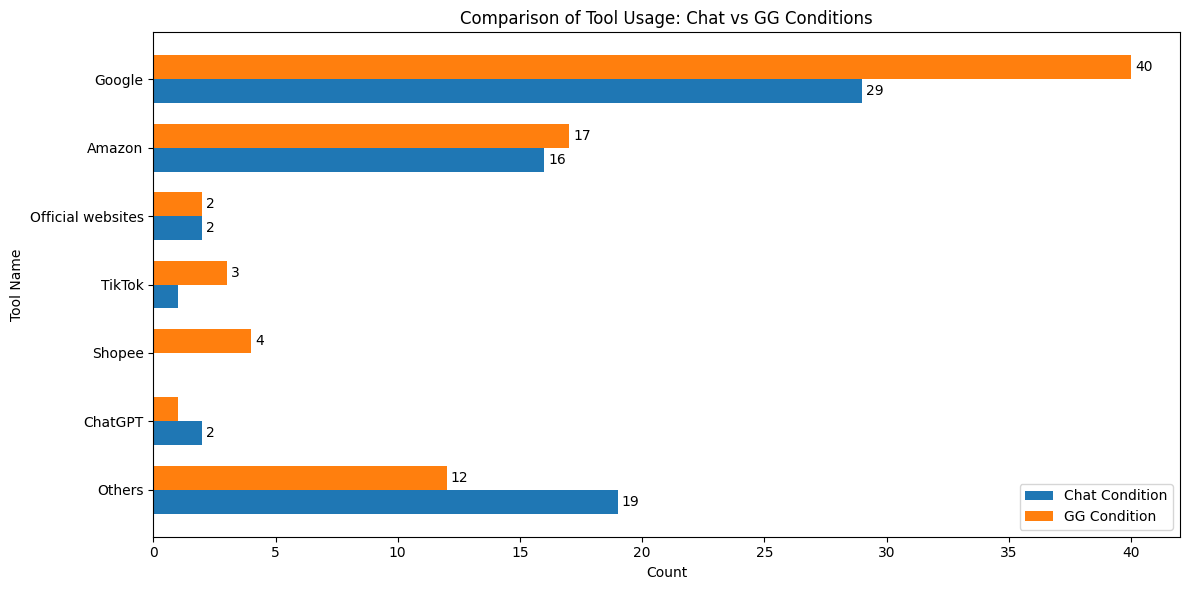

In [ ]:
# Comparison horizontal bar chart for tool usage (q10_tool_1 to q10_tool_4) in chat and gg conditions with fixed order
tool_cols = ["q10_tool_1", "q10_tool_2", "q10_tool_3", "q10_tool_4"]

# Accumulate tool counts for chat condition
chat_tools = []
for col in tool_cols:
    if col in df_chat_surveys.columns:
        chat_tools.extend(df_chat_surveys[col].dropna().astype(str).tolist())
chat_tool_counts = Counter(chat_tools)

# Accumulate tool counts for gg condition
gg_tools = []
for col in tool_cols:
    if col in df_gg_surveys.columns:
        gg_tools.extend(df_gg_surveys[col].dropna().astype(str).tolist())
gg_tool_counts = Counter(gg_tools)

# Fixed order for plotting
fixed_order = ["Others", "ChatGPT","Shopee", "TikTok", "Official websites", "Amazon","Google"]

chat_counts_sorted = [chat_tool_counts.get(tool, 0) for tool in fixed_order]
gg_counts_sorted = [gg_tool_counts.get(tool, 0) for tool in fixed_order]
y = range(len(fixed_order))
bar_height = 0.35

plt.figure(figsize=(12, max(6, len(fixed_order)*0.5)))
bars1 = plt.barh(y, chat_counts_sorted, height=bar_height, label='Chat Condition')
bars2 = plt.barh([i + bar_height for i in y], gg_counts_sorted, height=bar_height, label='GG Condition')
plt.yticks([i + bar_height/2 for i in y], fixed_order)
plt.xlabel('Count')
plt.ylabel('Tool Name')
plt.title('Comparison of Tool Usage: Chat vs GG Conditions')
plt.legend()

# Annotate bars only if count >= 2
for idx, bar in enumerate(bars1):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
for idx, bar in enumerate(bars2):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

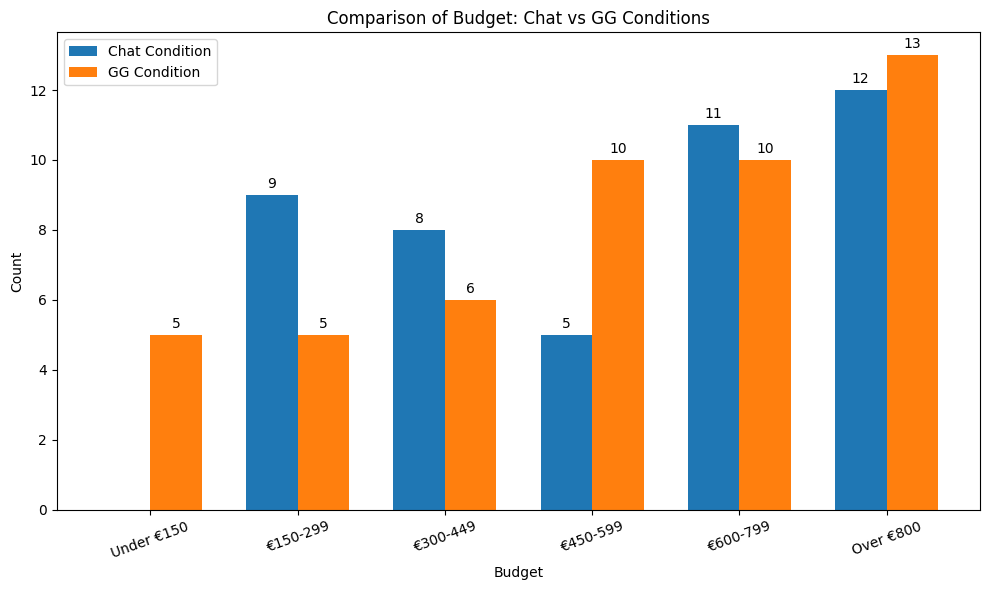

In [74]:
# Bar chart comparing q11_budget for chat and gg conditions with custom order and annotation
custom_budget_order = ["Under €150", "€150-299", "€300-449", "€450-599", "€600-799", "Over €800"]

# Replace missing values with 'Not specified'
df_chat_surveys['q11_budget'] = df_chat_surveys['q11_budget'].fillna('Not specified')
df_gg_surveys['q11_budget'] = df_gg_surveys['q11_budget'].fillna('Not specified')

chat_budget_counts = df_chat_surveys['q11_budget'].value_counts().reindex(custom_budget_order, fill_value=0)
gg_budget_counts = df_gg_surveys['q11_budget'].value_counts().reindex(custom_budget_order, fill_value=0)

bar_width = 0.35
x = range(len(custom_budget_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_budget_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_budget_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], custom_budget_order, rotation=20)
plt.xlabel('Budget')
plt.ylabel('Count')
plt.title('Comparison of Budget: Chat vs GG Conditions')
plt.legend()

# Annotate bars only if count >= 2
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

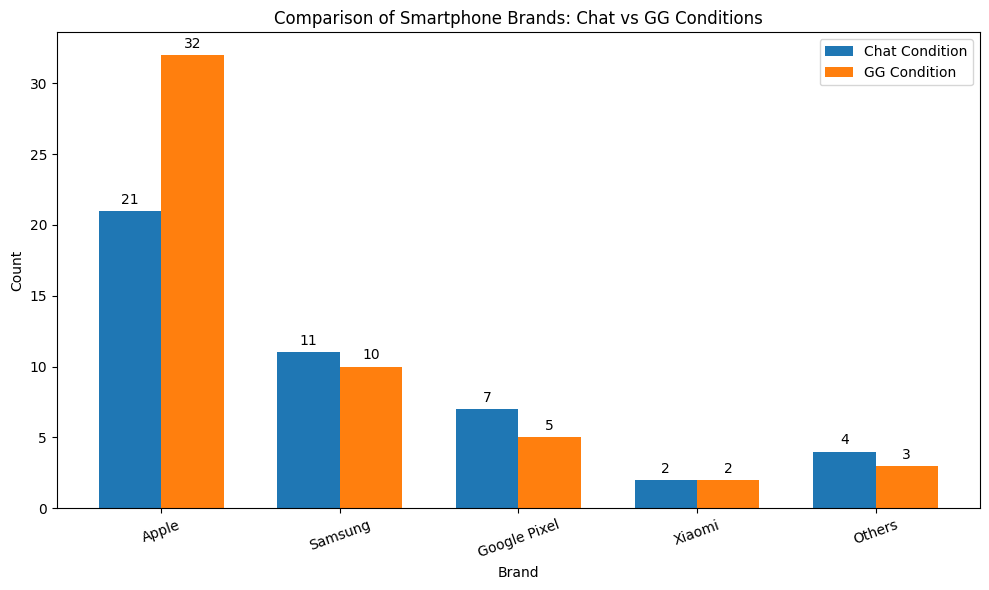

In [77]:
# Preprocess q12_brand_only in df_gg_surveys: rename 'Google' to 'Google Pixel', categorize other brands as 'Others', then plot vertical bar chart for brand comparison
df_gg_surveys['q12_brand_only'] = df_gg_surveys['q12_brand_only'].replace('Google', 'Google Pixel')
main_brands = ["Apple", "Samsung", "Google Pixel", "Xiaomi"]
df_gg_surveys['q12_brand_only'] = df_gg_surveys['q12_brand_only'].apply(lambda x: x if x in main_brands else "Others")
df_chat_surveys['q12_brand_only'] = df_chat_surveys['q12_brand_only'].apply(lambda x: x if x in main_brands else "Others")

# Replace missing values with 'Not specified'
df_chat_surveys['q12_brand_only'] = df_chat_surveys['q12_brand_only'].fillna('Not specified')
df_gg_surveys['q12_brand_only'] = df_gg_surveys['q12_brand_only'].fillna('Not specified')

brand_order = main_brands + ["Others"]
chat_brand_counts = df_chat_surveys['q12_brand_only'].value_counts().reindex(brand_order, fill_value=0)
gg_brand_counts = df_gg_surveys['q12_brand_only'].value_counts().reindex(brand_order, fill_value=0)

bar_width = 0.35
x = range(len(brand_order))
plt.figure(figsize=(10,6))
bars1 = plt.bar(x, chat_brand_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_brand_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], brand_order, rotation=20)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Comparison of Smartphone Brands: Chat vs GG Conditions')
plt.legend()

# Annotate bars only if count >= 2
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

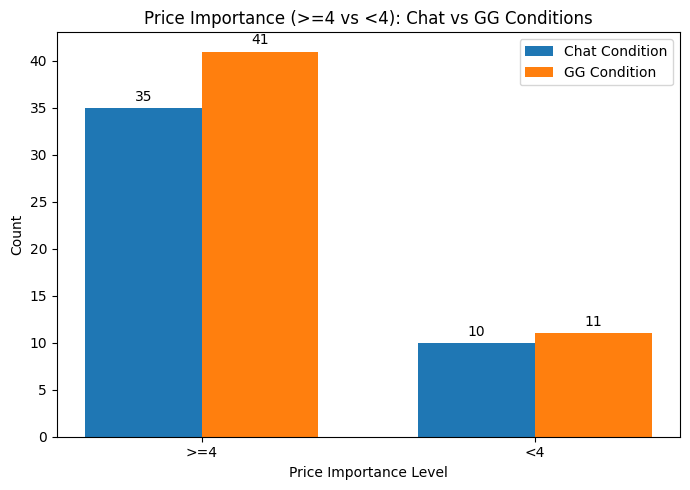

In [80]:
# Count and plot q17_price_importance grouped as '>=4' and '<4' for chat and gg conditions
def categorize_price_importance(val):
    try:
        num = float(val)
        return '>=4' if num >= 4 else '<4'
    except (ValueError, TypeError):
        return 'Not specified'

df_chat_surveys['q17_price_importance_group'] = df_chat_surveys['q17_price_importance'].apply(categorize_price_importance)
df_gg_surveys['q17_price_importance_group'] = df_gg_surveys['q17_price_importance'].apply(categorize_price_importance)

categories = ['>=4', '<4']
chat_counts = df_chat_surveys['q17_price_importance_group'].value_counts().reindex(categories, fill_value=0)
gg_counts = df_gg_surveys['q17_price_importance_group'].value_counts().reindex(categories, fill_value=0)

bar_width = 0.35
x = range(len(categories))
plt.figure(figsize=(7,5))
bars1 = plt.bar(x, chat_counts, width=bar_width, label='Chat Condition')
bars2 = plt.bar([i + bar_width for i in x], gg_counts, width=bar_width, label='GG Condition')
plt.xticks([i + bar_width/2 for i in x], categories, rotation=0)
plt.xlabel('Price Importance Level')
plt.ylabel('Count')
plt.title('Price Importance (>=4 vs <4): Chat vs GG Conditions')
plt.legend()

# Annotate bars only if count >= 2
for bar in bars1:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)
for bar in bars2:
    height = bar.get_height()
    if height >= 2:
        plt.annotate(f'{int(height)}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [81]:
# List unique values and their counts for q18_feature_1 to q18_feature_3 in df_gg_surveys
from collections import Counter
features = []
for col in ["q18_feature_1", "q18_feature_2", "q18_feature_3"]:
    if col in df_gg_surveys.columns:
        features.extend(df_gg_surveys[col].dropna().astype(str).tolist())
feature_counts = Counter(features)
print("Unique feature values and their counts across q18_feature_1 to q18_feature_3:")
for feature, count in feature_counts.items():
    print(f"{feature}: {count}")

Unique feature values and their counts across q18_feature_1 to q18_feature_3:
Other: 1
Battery: 36
Camera: 37
Storage: 22
Display: 13
Performance: 34
Software: 7


In [82]:
# List unique values and their counts for q18_feature_1 to q18_feature_3 in df_chat_surveys
from collections import Counter
features = []
for col in ["q18_feature_1", "q18_feature_2", "q18_feature_3"]:
    if col in df_chat_surveys.columns:
        features.extend(df_chat_surveys[col].dropna().astype(str).tolist())
feature_counts = Counter(features)
print("Unique feature values and their counts across q18_feature_1 to q18_feature_3:")
for feature, count in feature_counts.items():
    print(f"{feature}: {count}")

Unique feature values and their counts across q18_feature_1 to q18_feature_3:
Software support & updates: 13
Battery life/ fast charging: 32
Camera quality: 28
Performance/ speed: 25
Display Quality: 12
Storage capacity: 16
Other: 1


In [83]:
# Replace feature names in q18_feature_1, q18_feature_2, q18_feature_3 in df_gg_surveys as specified
feature_replacements = {
    "Battery": "Battery life/ fast charging",
    "Camera": "Camera quality",
    "Storage": "Storage capacity",
    "Display": "Display Quality",
    "Performance": "Performance/ speed",
    "Software": "Software support & updates"
}

for col in ["q18_feature_1", "q18_feature_2", "q18_feature_3"]:
    if col in df_gg_surveys.columns:
        df_gg_surveys[col] = df_gg_surveys[col].replace(feature_replacements)

# Preview the affected columns to confirm replacements
print(df_gg_surveys[["q18_feature_1", "q18_feature_2", "q18_feature_3"]].head(10))

                 q18_feature_1                q18_feature_2  \
0                        Other              Display Quality   
1  Battery life/ fast charging   Software support & updates   
2               Camera quality           Performance/ speed   
3  Battery life/ fast charging               Camera quality   
4  Battery life/ fast charging               Camera quality   
5  Battery life/ fast charging               Camera quality   
6  Battery life/ fast charging               Camera quality   
7             Storage capacity  Battery life/ fast charging   
8              Display Quality           Performance/ speed   
9               Camera quality           Performance/ speed   

                q18_feature_3  
0              Camera quality  
1                         NaN  
2            Storage capacity  
3             Display Quality  
4          Performance/ speed  
5          Performance/ speed  
6             Display Quality  
7              Camera quality  
8  Software suppor

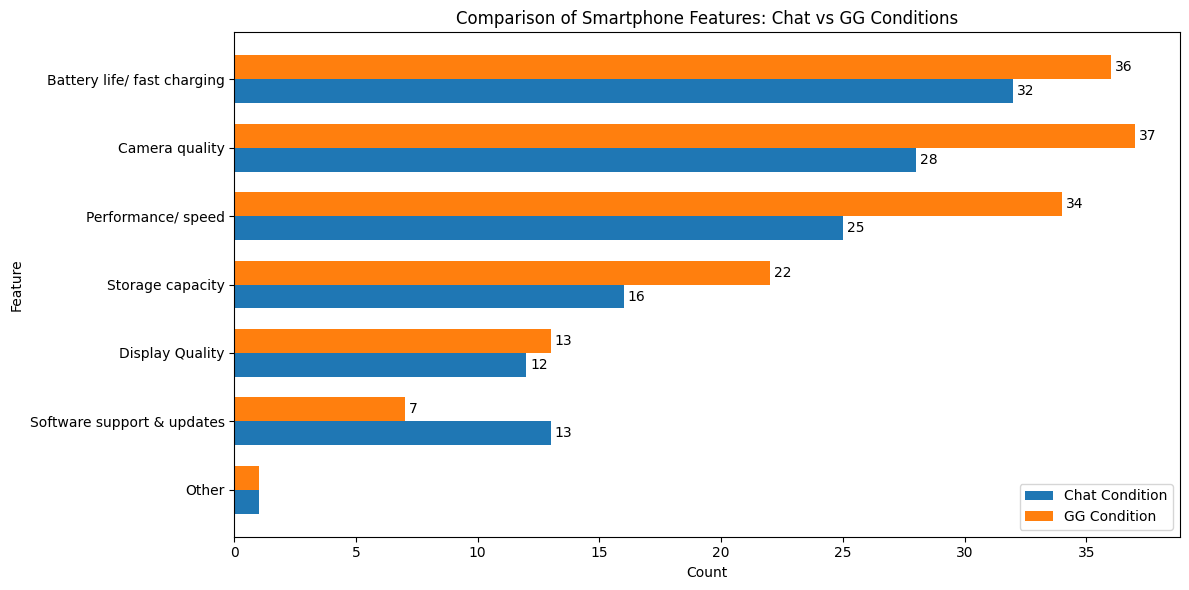

In [86]:
# Comparison horizontal bar chart for q18_feature_1 to q18_feature_3 in chat and gg conditions, accumulated counts, ascending order, annotate count >= 2

# Accumulate feature counts for chat condition
chat_features = []
for col in ["q18_feature_1", "q18_feature_2", "q18_feature_3"]:
    if col in df_chat_surveys.columns:
        chat_features.extend(df_chat_surveys[col].dropna().astype(str).tolist())
chat_feature_counts = Counter(chat_features)

# Accumulate feature counts for gg condition
gg_features = []
for col in ["q18_feature_1", "q18_feature_2", "q18_feature_3"]:
    if col in df_gg_surveys.columns:
        gg_features.extend(df_gg_surveys[col].dropna().astype(str).tolist())
gg_feature_counts = Counter(gg_features)

# Get all features and sort by total count ascending
all_features = set(chat_feature_counts.keys()).union(set(gg_feature_counts.keys()))
total_counts = {feat: chat_feature_counts.get(feat,0) + gg_feature_counts.get(feat,0) for feat in all_features}
sorted_features = sorted(all_features, key=lambda x: total_counts[x])

chat_counts_sorted = [chat_feature_counts.get(feat, 0) for feat in sorted_features]
gg_counts_sorted = [gg_feature_counts.get(feat, 0) for feat in sorted_features]
y = range(len(sorted_features))
bar_height = 0.35

plt.figure(figsize=(12, max(6, len(sorted_features)*0.5)))
bars1 = plt.barh(y, chat_counts_sorted, height=bar_height, label='Chat Condition')
bars2 = plt.barh([i + bar_height for i in y], gg_counts_sorted, height=bar_height, label='GG Condition')
plt.yticks([i + bar_height/2 for i in y], sorted_features)
plt.xlabel('Count')
plt.ylabel('Feature')
plt.title('Comparison of Smartphone Features: Chat vs GG Conditions')
plt.legend()

# Annotate bars only if count >= 2
for idx, bar in enumerate(bars1):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)
for idx, bar in enumerate(bars2):
    width = bar.get_width()
    if width >= 2:
        plt.annotate(f'{int(width)}',
                     xy=(width, bar.get_y() + bar.get_height() / 2),
                     xytext=(3, 0),
                     textcoords="offset points",
                     ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()